<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Build_and_deploy_your_first_machine_learning_web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Build and Deployed/insurance.csv',encoding = 'latin')

In [ ]:
Train_data

# **1- Introduciton**

In this tutorial we will use **PyCaret** to develop a machine learning pipeline, that will include preprocessing transformations and a regression model to predict patient hospitalization charges based on demographic and basic patient health risk metrics such as age, BMI, smoking status etc.

# **2-What tools we will use in this tutorial?**

## **2.1 PyCaret**

PyCaret is an open source, low-code machine learning library in Python to train and deploy machine learning pipelines and models in production. PyCaret can be installed easily using pip.

In [ ]:
# for Jupyter notebook on your local computer
pip install pycaret

In [ ]:
# for azure notebooks and google colab
!pip install pycaret

In [ ]:
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## **2.2 Flask**

Flask is a framework that allows you to build web applications. A web application can be a commercial website, a blog, e-commerce system, or an application that generates predictions from data provided in real-time using trained models. If you don’t have Flask installed, you can use pip to install it.

In [ ]:
# install flask
pip install Flask

## **2.3 GitHub**

GitHub is a cloud-based service that is used to host, manage and control code. Imagine you are working in a large team where multiple people (sometime hundreds of them) are making changes. PyCaret is itself an example of an open-source project where hundreds of community developers are continuously contributing to source code. If you haven’t used GitHub before, you can sign up for a free account.

## **2.4 Heroku**

Heroku is a platform as a service (PaaS) that enables the deployment of web apps based on a managed container system, with integrated data services and a powerful ecosystem. In simple words, this will allow you to take the application from your local machine to the cloud so that anybody can access it using a Web URL. In this tutorial we have chosen Heroku for deployment as it provides free resource hours when you sign up for new account.

#3-**Problem**

An insurance company wants to improve its cash flow forecasting by better predicting patient charges using demographic and basic patient health risk metrics at the time of hospitalization.

# **4- Model Training and Validation**

In [ ]:
# Experiment No. 2
from pycaret.regression import *
r2 = setup(Train_data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

In [ ]:
# Model Training and Validation 
lr = create_model('lr')

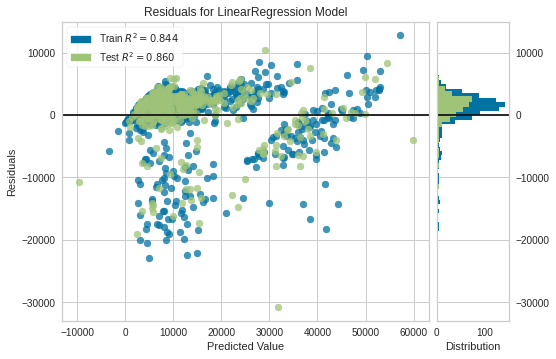

In [9]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [39]:
# save transformation pipeline and model 
save_model(lr, model_name ="/content/drive/MyDrive/Datasets/Build and Deployed/deployment_28042020")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [ ]:
model_save_name = 'deployment_28042020'

In [34]:
path = F"/content/drive/MyDrive/Datasets/Build and Deployed/deployment_28042020" 

In [38]:
import torch
torch.save(save_model.state_dict(), path)

AttributeError: ignored

# **3- Building Web Application**

Now that our machine learning pipeline and model are ready we will start building a web application that can connect to them and generate predictions on new data in real-time. There are two parts of this application:
- Front-end (designed using HTML)
- Back-end (developed using Flask in Python)

##**3.1 -Front-end of Web Application**

Generally, the front-end of web applications are built using HTML which is not the focus of this article. We have used a simple HTML template and a CSS style sheet to design an input form. Here’s the HTML snippet of the front-end page of our web application.

## **3.2 Back-end of Web Application**

The back-end of a web application is developed using a Flask framework. For beginner’s it is intuitive to consider Flask as a library that you can import just like any other library in Python. See the sample code snippet of our back-end written using a Flask framework in Python.

# **References**
[[1]Build and deploy your first machine learning web app](https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99)